# The Scikit-learn Python Library

[Official Website](https://scikit-learn.org/stable/index.html)

# DecisionTreeRegressor - Decision Tree Algorithm
## Forest Fire Dataset
### Goal is to predict the burned area of forest fires
https://scikit-learn.org/stable/modules/tree.html#tree
***



# End of DecisionTreeRegressor - Decision Tree Algorithm

***

***

***

# K-Means - Clustering Algorithm
## Household Power Consumption Dataset
### Goal is to predict a short term forecast on electricity consumption 
https://scikit-learn.org/stable/modules/clustering.html#k-means

***



# End of K-Means - Clustering Algorithm

***

***

***

# LinearSVC - Support Vector Machine Algorithm
## Wine Dataset
https://archive.ics.uci.edu/ml/datasets/Wine
### Goal is to use chemical analysis to determine the origin of wines
https://scikit-learn.org/stable/modules/svm.html#svm-classification
***

## Setup


In [2]:
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Functions creating iterators for efficient looping
from itertools import combinations

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Using seaborn style
plt.style.use('seaborn')

<br>

### Uploading and Enchancing the Wine Data Set

***

In [4]:
# Loading the wine data set
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Emerging-Technologies-Assessment/main/wine.csv", header = None);

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Adding headers to the dataset
df.columns = [  'type','alcohol','malic acid','ash','alcalinity','magnesium','total phenols',
              'flavanoids','nonflavanoid phenols','proanthocyanins','colour intensity','hue','od280/od315','proline']
df

,type,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
# Summary statistics
df.describe()

,type,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Checking for Missing Values
df.isnull().sum()

type                    0
alcohol                 0
malic acid              0
ash                     0
alcalinity              0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
colour intensity        0
hue                     0
od280/od315             0
proline                 0
dtype: int64

<br>

### Data Visualisation

***

This data set has many different features. Using the best ways to plot these data points will help us understand the relationship between the features helping us analyse the dataset better

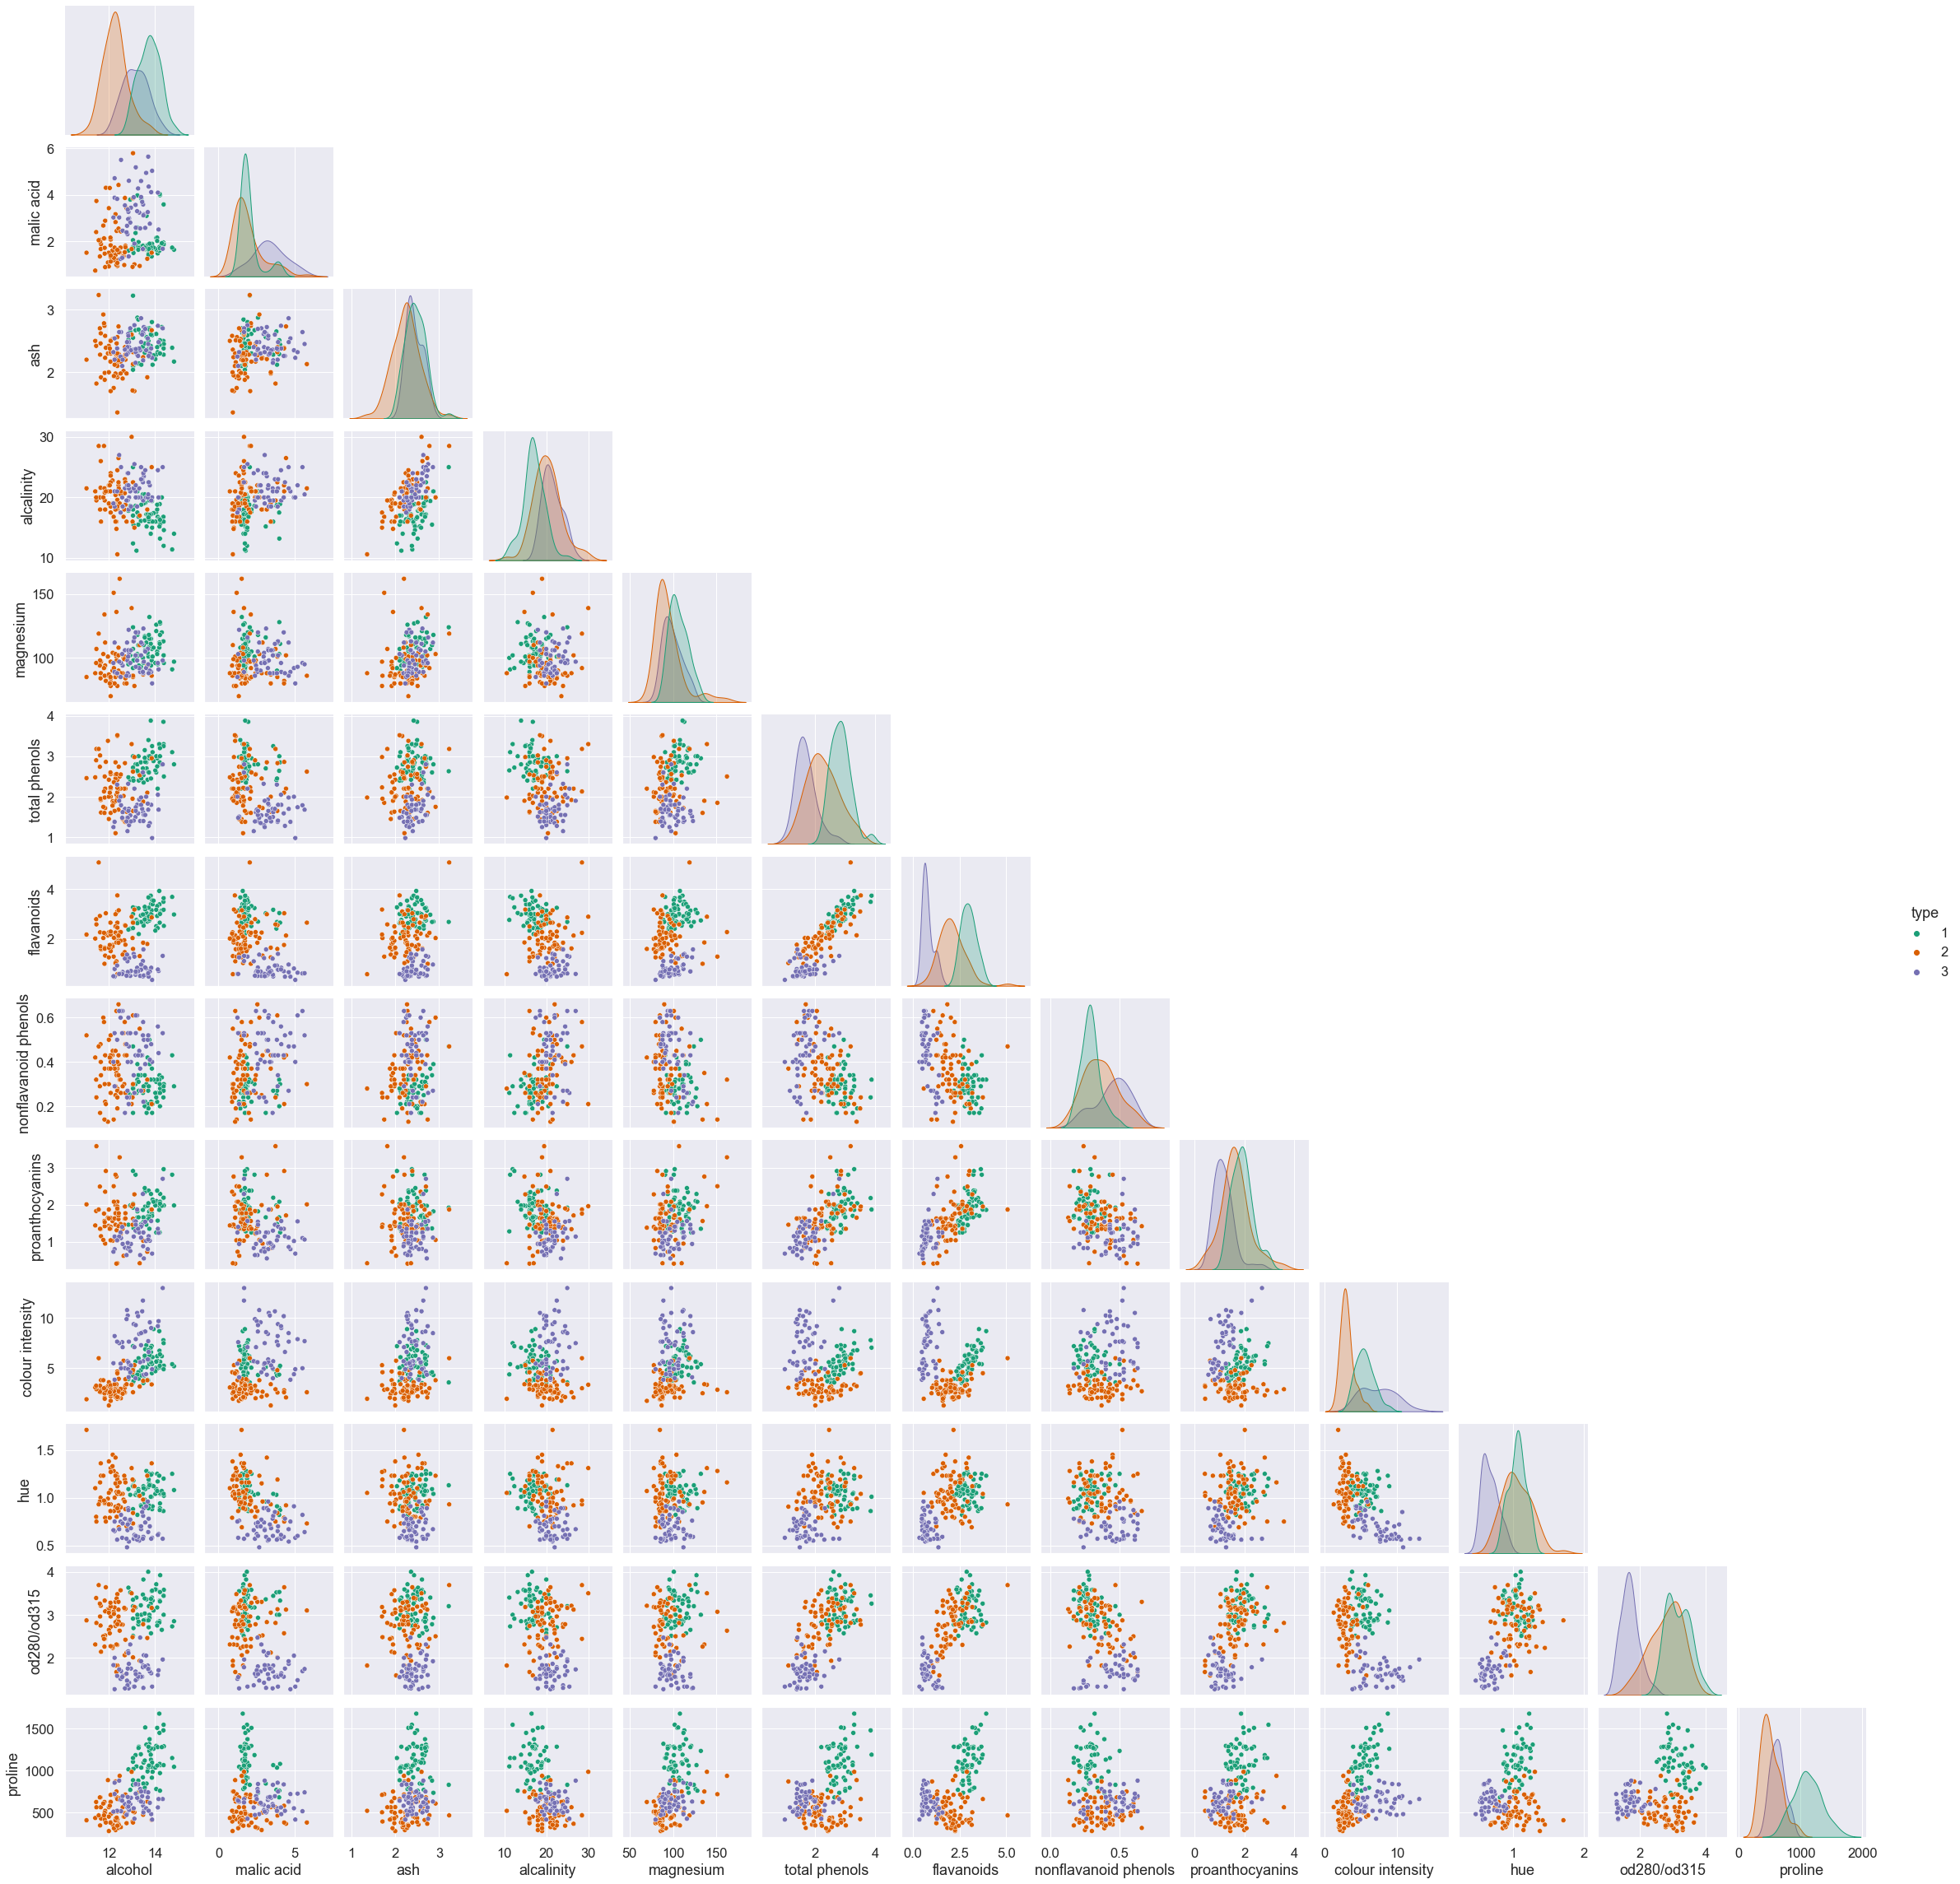

In [9]:
# Using pairplot plotting all the features against each other and grouping the data points by class
sns.set(font_scale=1.5)
sns.pairplot(df, hue='type', palette = "Dark2", corner = True);

It can be hard to analyse so many pair plots as there are so many of them but it's a good starting point. <br>
The correlation heatmap would work better in this situation to showcase the relationship between the features.

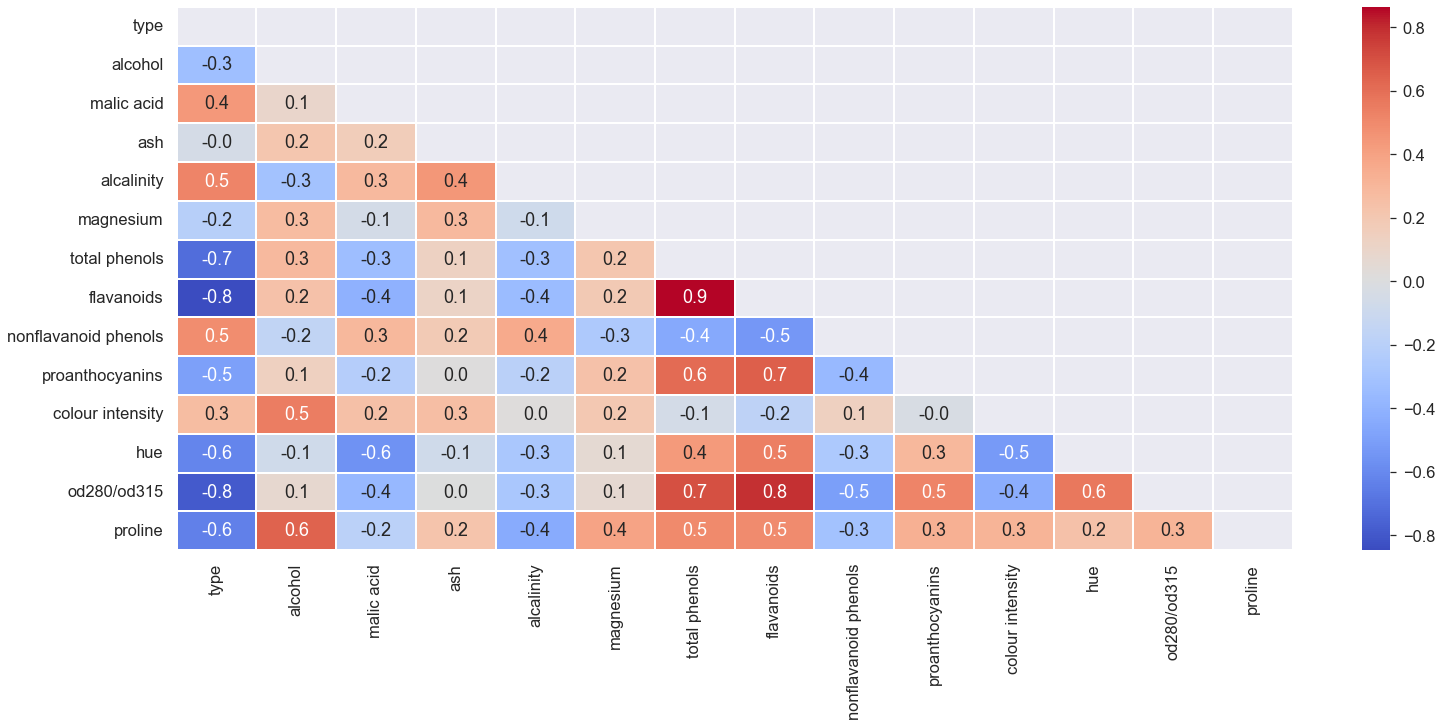

In [10]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

f, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.corr(), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm", mask = mask)

plt.show()

<br><br>
This doesn't tell us much actually... There is nothing differentiating the three types of wine and so the relationship between features doesn't tell us much <br><br>
What I've chosen to do here now, is split the three different types of wines into their own dataframe so we can analyse the heatmaps individually. <br>
This should tell us a good amount about each type of wine and their relationship with each attribute <br>

Before we do this, we want to correlate each type of wine by an attribute. I'll start by plotting and visualising the distribution of alcohol content by type to see if there is a big enough difference between types. If so, we'll correlate each type of wine by their alcohol content and derive information about the other attributes by type

In [11]:
# Setting up first type of wine
type1_df = df[df.type == 1]
type1_df = type1_df.drop('type', axis = 1)
type1_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


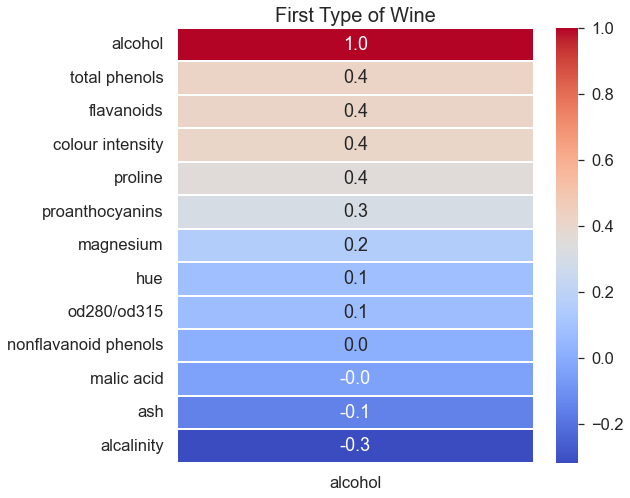

In [12]:
# Plotting first type of wine
# Correlating it with alcohol to better see the information

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type1_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("First Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the first type of wine
- Its high in (0.4 - 1.0)
    * Toal Phenols
    * Flavanoids
    * Colour Intensity
    * Proline
<br>
- Its moderately high in (0.2 - 0.3)
    * Proanthocyanins
    * Magnesium
<br>
- Its moderate in (-0.1 - 0.1)
    * Hue
    * OD280/OD315
    * NonFlavanoid Phenols
    * Malic Acid
    * Ash
<br>
- Its moderately low in (-0.2 - -0.3)
    * Alcalinity
<br>

In [13]:
# Setting up second type of wine
type2_df = df[df.type == 2]
type2_df = type2_df.drop('type', axis = 1)
type2_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


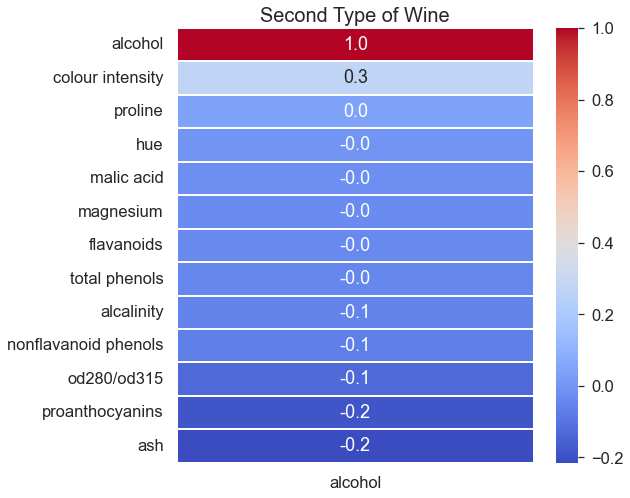

In [14]:
# Plotting second type of wine
# Correlating it with alcohol to better see the information

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type2_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("Second Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the second type of wine
- Its moderately high in (0.2 - 0.3)
    * Colour Intensity
<br>
- Its moderate in (-0.1 - 0.1)
    * Proline
    * Hue
    * Malic Acid
    * Magnesium
    * Flavanoids
    * Total Phenols
    * Alcalinity
    * Nonflavanoid Phenols
    * OD280/OD315
<br>
- Its moderately low in (-0.2 - -0.3)
    * Proanthocyanins
    * Ash
<br>

In [15]:
# Setting up third type of wine
type3_df = df[df.type == 3]
type3_df = type3_df.drop('type', axis = 1)
type3_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


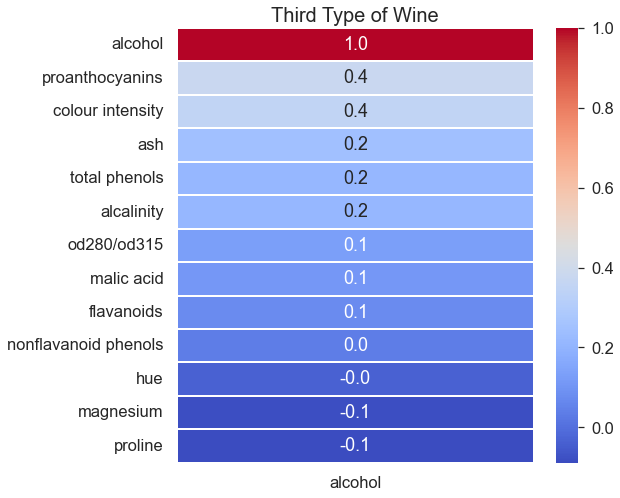

In [16]:
# Plotting third type of wine
# Correlating it with alcohol to better see the information

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type3_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("Third Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the third type of wine
- Its high in (0.4 - 1.0)
    * Proanthocyanins
    * Colour intensity
<br>
- Its moderately high in (0.2 - 0.3)
    * Alcalinity
    * Ash
    * Total Phenols
<br>
- Its moderate in (-0.1 - 0.1)
    * OD280/OD315
    * Malic Acid
    * Flavanoids
    * Nonflavanoid Phenols
    * Hue
    * Magnesium
    * Proline

This tells us a good bit about each type of wine by their alcohol level <br>
I'm going to visualise these three heatmaps next to each other so it's easier to pick out the more differentiating features for each wine

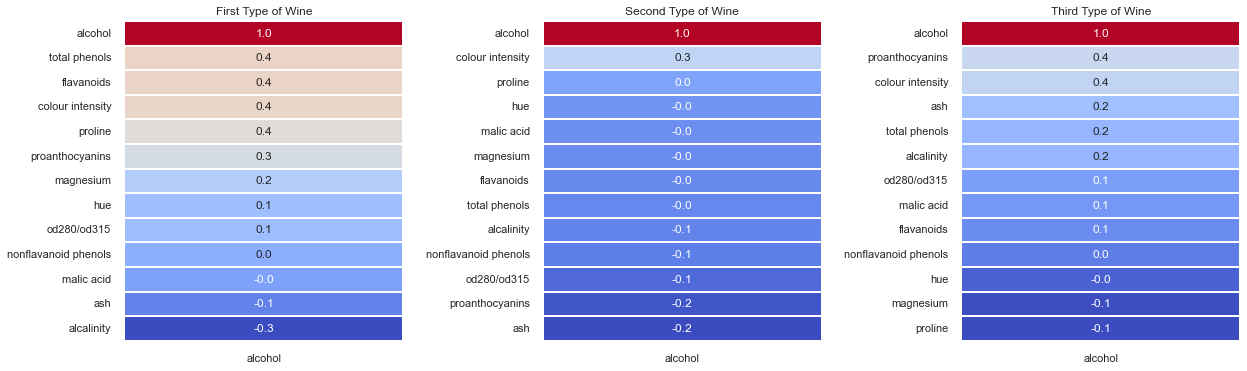

In [40]:
# Plotting each type of wine next to each other
# Correlating it with alcohol to keep information consistent 

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

plt.subplots_adjust(wspace = 0.5)
ax1.set_title("First Type of Wine")
sns.heatmap(type1_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax1, cmap = "coolwarm", cbar = False)
ax2.set_title("Second Type of Wine")
sns.heatmap(type2_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax2, cmap = "coolwarm", cbar = False)
ax3.set_title("Third Type of Wine")
sns.heatmap(type3_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax3, cmap = "coolwarm", cbar = False)

plt.show()

By observing the graph, we will be able tell each type of wine by their most distinct attributes. <br>
We can then use this to better teach our algorithm and hopefully achieve a higher accuracy with it.

 these are the attributes that are most distinct for each of the types of wine

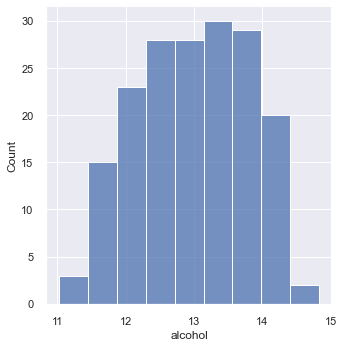

In [36]:
# Distribution of alcohol content
sns.set(font_scale=1)
sns.displot(df['alcohol'], kde = 0)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

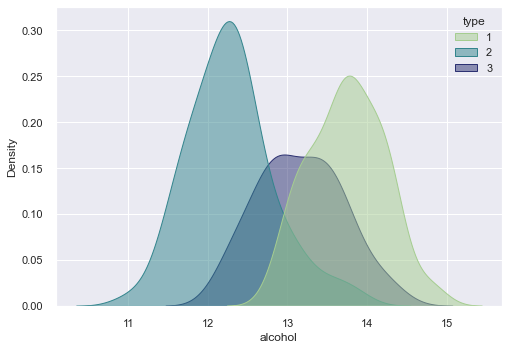

In [19]:
# Distribution of alcohol content by class
sns.kdeplot(data = df, x = "alcohol", hue = "type", fill = True, palette="crest", alpha = 0.5)

In [20]:
df.columns

Index(['type', 'alcohol', 'malic acid', 'ash', 'alcalinity', 'magnesium',
       'total phenols', 'flavanoids', 'nonflavanoid phenols',
       'proanthocyanins', 'colour intensity', 'hue', 'od280/od315', 'proline'],
      dtype='object')



# End of LinearSVC - Support Vector Machine Algorithm

***
